# Finch Carr PHYS 434 HW 2
## Problem 1)
- We want to find out which is more probable when rolling 2 six-sided dice: rolling two ones together or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

In [1]:
# Finch's Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import random
%matplotlib inline

In [2]:
# Die Simulator
dice1 = stats.randint(1, 7)
dice1.rvs(10000).min()
dice2 = stats.randint(1, 7)
dice2.rvs(10000).max()

6

- In the *'stats.randint()'* function, the upper bound of 7 is exclusive so the integers possible are 1-6 like a real die piece
- The *'.rvs(10000).max()'* function returns the maximum from the 10000 hypothetical rolls I made. Since it returned a max value of 6 over 10000 rolls, I can probably say that my dice roller simulation is working
- I can now calculate the probability of rolling a specific integer between 1 and 6 using the *'.pmf()'* function

In [3]:
dice1.pmf(5), dice2.pmf(7)

(0.16666666666666666, 0.0)

- I see that I have a 1/6 chance of rolling a 5, and a 0% chance of rolling a 7, both values are what I would expect. 
- I can now calculate the probability of one dice roll, and knowing that two separate dice rolls are independent events, I can calculate the total probability of the two events occuring (rolling snake eyes) using the correct equation and parameters

In [4]:
SnakeEyes = dice1.pmf(1)*dice2.pmf(1)
SnakeEyes * 100

2.7777777777777777

- I find that there is a mere 2.7% chance that I would roll snake eyes on any given 2-dice roll
- Let's find the probability for rolling numbers that sum to a total roll value of 7 next
   - All possible combinations that sum to seven are (1-6, 2-5, 3-4, 4-3, 5-2, and 6-1) or the first half of those probabilities multiplied by a factor of 2 and summed

In [183]:
SevenSum = (2*(dice1.pmf(1)*dice2.pmf(6))) + (2*(dice1.pmf(2)*dice2.pmf(5))) + (2*(dice1.pmf(3)*dice2.pmf(4)))
SevenSum * 100

16.666666666666664

- I find that there is a 16% chance my two dice rolls will result in a total sum of 7

In [6]:
SevenSum / SnakeEyes

6.0

- ANSWER: **It is 6 times more likely that I will roll a sum of 7 than rolling snake eyes**

# Problem 2

- I now want to show how to use the convolution operator to determine the probability of the sum of 2 six-sided dice

In [7]:
diceA = [1,2,3,4,5,6]
diceB = [1,2,3,4,5,6]
np.convolve(diceA, diceB, mode='full')

array([ 1,  4, 10, 20, 35, 56, 70, 76, 73, 60, 36])

- The discrete convolution function can be defined mathematically as $y(n) = (a * v)[n] = \sum_{m = -\infty}^{\infty} a[m] v[n - m]$
- Where (for our dice situation):
    - y = the convolution output from f and g over an interval n
      - y is an output array (in 'full' mode) of the length m+n-1 (so in our case the length=11)
    - a = a 1D vector with a length m
      - (I used 'diceA' array with length of 6) so m=6 in this case 
    - v = a 1D vector with a length n
      - (I used 'diceB' array with length of 6) so n=6 in this case
- The convolution operator flips the order of the 'v' array, then it "slip 'n slides" that vector over the 'a' vector, and finally it multiplies the overlapping numbers and then sums them together before sliding another length unit and repeating the process until the arrays no longer overlap anymore
- I can prove this convolution function is correct and accurate by using the 'valid' mode in the 'np.convolve()' function, since it takes only the positions that have the arrays completely covering each other. Let's prove it
  - The visual representation would be as follows:
    - \[1,2,3,4,5,6\]
    - \[6,5,4,3,2,1\]
    - so 1 and 6 are multiplied, just like 2 and 5, so on and so forth

In [130]:
# The visual representation's mathematics:
Visual = ((1*6)+(2*5)+(3*4)+(4*3)+(5*2)+(6*1))

#The convolution function with the 'valid' mode:
ConvEx = np.convolve(diceA, diceB, mode='valid')
Visual, ConvEx[0]

(56, 56)

- Since the two results are equal, I know that I can now use the np.convolve function to help me determine the sum of the probabilities of two dice rolls.
- I know that 6 sides on each die lead to 36 possible combinations of roll results. Lots of different results will sum to the same total, however (i.e. A1 and B4 sum to 5 just like A2 and B3 do). I want the probability of each individual sum, like the probability from the previous question that my rolls will sum to 7, but I don't want to recode *SevenSum* and all its possible inputs for every possible sum from 2 (A1 and B1) to 12 (A6 and B6)
- This is where convolution should be able to help! It turns out that the probability density of a sum of random numbers (whether those numbers are 1-6 and 1-6 summed, or 0-infinity and 0-infinity summed) is the convolution of their individual probability density functions
  - Therefore, we need the individual probability density functions for each die result to convolve, and then we can combine them for the pdf of their sum (Commutative Property)
  - We should also note that for two independent dice rolls A and B, $\sigma_0 = \sigma_A + \sigma_B$, and $\mu_0 = \mu_A + \mu_B$
    - Their $\sigma$ and $\mu$ values add to a total value for each respectively, that is the mean and standard deviation for the distribution of the sums!

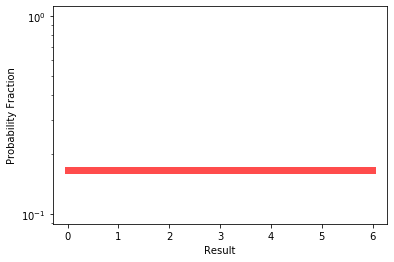

In [185]:
fig, ax = plt.subplots(1,1)
plt.yscale('log')

#Number of rolls should be high to normalize our sum
rolls = 1000

#lets make an automatic dice roll for-loop using the 'stats.randint' function
#Remember from earlier that the function does not include the upper bound
Roll = []
for i in range(rolls):
    result = stats.randint(1,7).rvs(1)
    Roll.append(result)

mu1 = 3.5
std1 = 1.71

# Create our x-axis we can plot a one-die pdf on
x = np.linspace(stats.uniform.ppf(0.001, loc=0, scale=6), 
                stats.uniform.ppf(0.999, loc=0, scale=6), num=rolls)

# Plot Distribution against input x-values
ax.plot(x, stats.uniform.pdf(x, scale=6, loc=0), 'r-', lw=7, 
        alpha=0.7, label='Normal PDF')
    
plt.xlabel('Result')
plt.ylabel('Probability Fraction')
plt.xticks(np.arange(0,7,1)) 
plt.show()

In [131]:
#Sums and their respective options of outcome to achieve on dice A and B for reference
#2 (1,1) x1 1
#3 (2,1) x2 2
#4 (1,3) x2, (2,2) x1 3
#5 (1,4) x2, (2,3) x2 4
#6 (1,5) x2, (2,4) x2, (3,3) x1 5
#7 (1,6) x2, (2,5) x2, (3,4) x2 6
#8 (2,6) x2, (3,5) x2, (4,4) x1 5
#9 (3,6) x2, (4,5) x2, 4
#10 (4,6) x2, (5,5) x1, 3
#11 (5,6) x2
#12 (6,6) x1

#Total Outcomes = 1+2+3+4+5+6+5+4+3+2+1 = 36 total options

# Probabilities of Each sum (must sum to 36/36 i.e. 1)
p2 = 1/36
p3 = 2/36
p4 = 3/36
p5 = 4/36
p6 = 5/36
p7 = 6/36
p8 = 5/36
p9 = 4/36
p10 = 3/36
p11 = 2/36
p12 = 1/36
weight=(1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36)

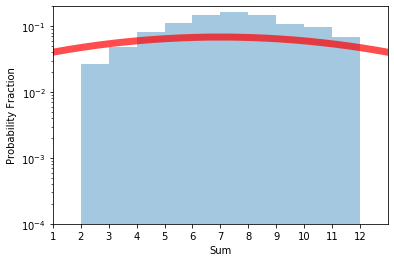

In [181]:
fig, ax = plt.subplots(1,1)
plt.yscale('log')

#Number of rolls should be high to normalize our sum
rolls = 1000

#lets make an automatic dice roll for-loop using the 'stats.randint' function
#Remember from earlier that the function does not include the upper bound
Roll2 = []
for i in range(rolls):
    result = stats.randint(1,7).rvs(2).sum()
    Roll2.append(result)

mu2 = 7
std2 = 5.83

# Create our x-axis we can plot a one-die pdf on
y = np.linspace(stats.norm.ppf(0.001, loc=mu2, scale=std2), 
                stats.norm.ppf(0.999, loc=mu2, scale=std2), num=rolls)

# Plot Distribution against input x values
ax.plot(y, stats.norm.pdf(y, scale=std2, loc=mu2), 'r-', lw=7, 
        alpha=0.7, label='Normal PDF')
    
# Let's plot a histogram of those 10000 hypothetical dice rolls 
# and compare it to the normal distribution
ax.hist(Roll2, bins=np.arange(0,13,1), density=True, histtype = 'stepfilled', 
        alpha=0.4, label='Frozen PDF')
plt.xlabel('Sum')
plt.xlim(1,13,1)
plt.ylim(0.0001, 0.20)
plt.ylabel('Probability Fraction')
plt.xticks(np.arange(1,13,1)) 
plt.show()